In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

Research on reversion of Kelp

In [2]:
for i, day in enumerate([0, 1, 2]):
    file_name = f"../round3_new/round-3-island-data-bottle/prices_round_3_day_{day}.csv"
    df_tmp = pd.read_csv(file_name, sep=';')
    df_tmp['day'] = day
    if i > 0:
        df = pd.concat([df, df_tmp])
    else:
        df = df_tmp
df = df.reset_index(drop=True)

In [50]:
df_kelp = df[df["product"] == "SQUID_INK"].reset_index(drop=True).copy()

Calculate the reversion of filtered mid price. The thresholding volume is 15.

In [51]:
def find_min_i_bid(row):
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 15:
            return pd.Series([row[f'bid_price_{i}'], row[f'bid_volume_{i}']])
    return pd.Series([np.nan, np.nan])

def find_min_i_ask(row):
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 15:
            return pd.Series([row[f'ask_price_{i}'], row[f'ask_volume_{i}']])
    return pd.Series([np.nan, np.nan])

df_kelp[['filtered_bid_price', 'filtered_bid_volume']] = df_kelp.apply(find_min_i_bid, axis=1)
df_kelp[['filtered_ask_price', 'filtered_ask_volume']] = df_kelp.apply(find_min_i_ask, axis=1)


In [52]:
df_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,filtered_bid_price,filtered_bid_volume,filtered_ask_price,filtered_ask_volume
0,0,0,SQUID_INK,1968.0,30.0,NaN,NaN,NaN,NaN,1971,...,NaN,NaN,NaN,NaN,1969.5,0.0,1968.0,30.0,1971.0,30.0
1,0,100,SQUID_INK,1969.0,4.0,1967.0,31.0,NaN,NaN,1971,...,NaN,NaN,NaN,NaN,1970.0,0.0,1967.0,31.0,1971.0,31.0
2,0,200,SQUID_INK,1966.0,1.0,1965.0,21.0,NaN,NaN,1969,...,NaN,NaN,NaN,NaN,1967.5,0.0,1965.0,21.0,1969.0,22.0
3,0,300,SQUID_INK,1965.0,25.0,NaN,NaN,NaN,NaN,1968,...,NaN,NaN,NaN,NaN,1966.5,0.0,1965.0,25.0,1968.0,25.0
4,0,400,SQUID_INK,1966.0,25.0,NaN,NaN,NaN,NaN,1968,...,1969.0,25.0,NaN,NaN,1967.0,0.0,1966.0,25.0,1969.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,999500,SQUID_INK,1822.0,28.0,NaN,NaN,NaN,NaN,1824,...,1825.0,28.0,NaN,NaN,1823.0,0.0,1822.0,28.0,1825.0,28.0
29996,2,999600,SQUID_INK,1822.0,30.0,NaN,NaN,NaN,NaN,1824,...,1825.0,30.0,NaN,NaN,1823.0,0.0,1822.0,30.0,1825.0,30.0
29997,2,999700,SQUID_INK,1822.0,28.0,NaN,NaN,NaN,NaN,1825,...,NaN,NaN,NaN,NaN,1823.5,0.0,1822.0,28.0,1825.0,28.0
29998,2,999800,SQUID_INK,1821.0,29.0,NaN,NaN,NaN,NaN,1824,...,1825.0,27.0,NaN,NaN,1822.5,0.0,1821.0,29.0,1825.0,27.0


In [53]:
df_kelp['filtered_mid'] = (df_kelp["filtered_ask_price"] + df_kelp["filtered_bid_price"]) / 2

In [54]:
df_kelp['filtered_mid'] = df_kelp['filtered_mid'].fillna(df_kelp['mid_price'])

In [55]:
df_kelp['filtered_mid'].isnull().sum()

0

In [56]:
df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] = df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] .fillna(0)

In [57]:
df_kelp['rtn'] = df_kelp['filtered_mid'].pct_change()
df_kelp['rtn_lag_1'] = df_kelp['filtered_mid'].pct_change().shift()

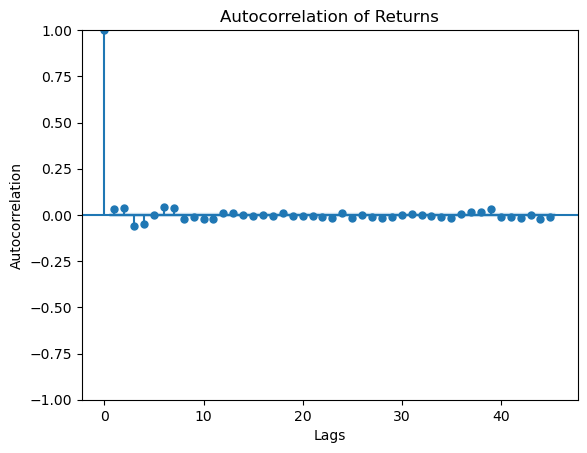

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(df_kelp['rtn'].dropna())
plt.title('Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

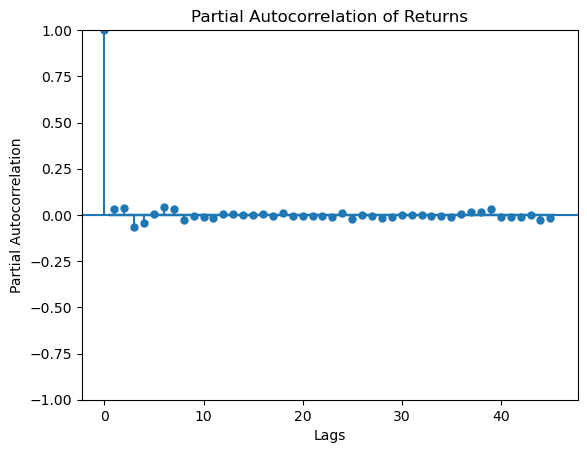

In [59]:
plot_pacf(df_kelp['rtn'].dropna())
plt.title('Partial Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [60]:
df_kelp['imb'] = (df_kelp['filtered_bid_volume'] - df_kelp['filtered_ask_volume']) / (df_kelp['filtered_bid_volume'] + df_kelp['filtered_ask_volume'])
df_kelp.loc[(df_kelp['filtered_bid_volume'] == 0) & (df_kelp['filtered_ask_volume'] == 0), 'imb'] = 0

In [61]:
df_kelp['rtn'].corr(df_kelp['rtn_lag_1'])

0.030032842434810785

In [62]:
df_kelp['rtn'].corr(df_kelp['imb'].shift())

0.016920977880937615

In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_kelp[['rtn', 'imb']].shift().values[2:], df_kelp['rtn'].values[2:].reshape(-1, 1))


LinearRegression()

In [64]:
lr.coef_, lr.intercept_

(array([[0.030252  , 0.00028439]]), array([-3.63467724e-06]))

In [65]:
df_kelp['vol'] = df_kelp['rtn'].pow(2)

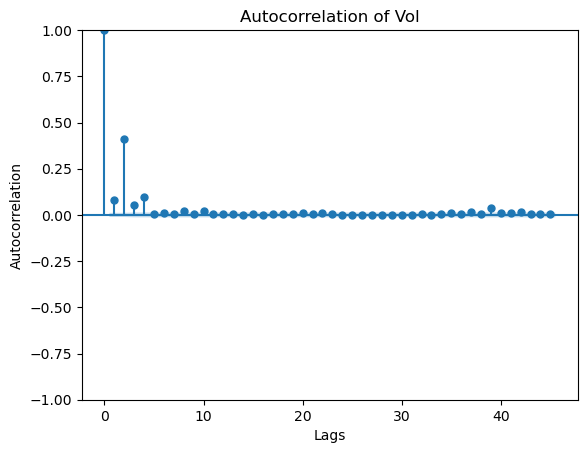

In [67]:
plot_acf(df_kelp['vol'].dropna())
plt.title('Autocorrelation of Vol')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

<Axes: >

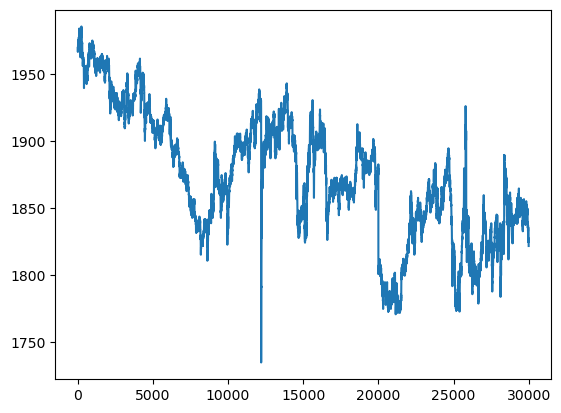

In [74]:
df_kelp['filtered_mid'].plot()

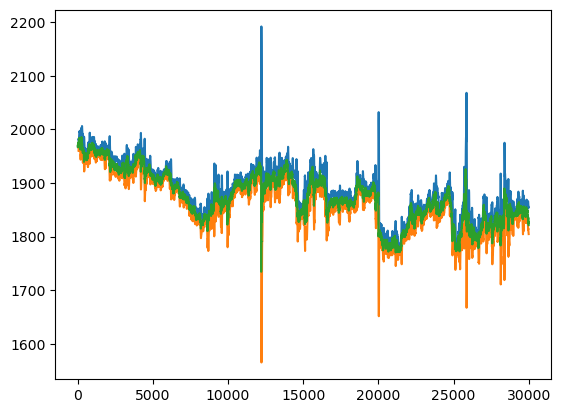

In [69]:
window = 50
thres = 5
theo = df_kelp['filtered_mid'].rolling(window=window).mean()
std = df_kelp['filtered_mid'].rolling(window=window).std()
plt.plot(theo + thres * std, label='Upper Band')
plt.plot(theo - thres * std, label='Lower Band')
plt.plot(df_kelp['filtered_mid'], label='Filtered Mid Price')
plt.show()

<Axes: >

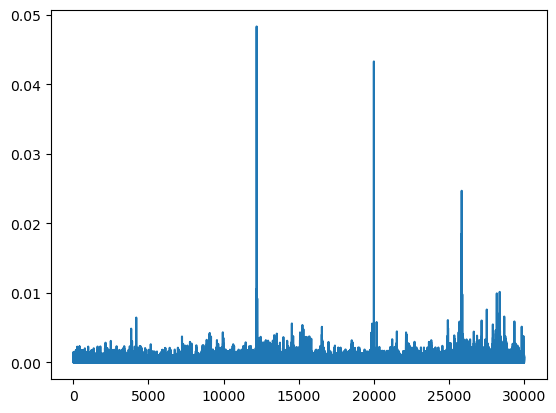

In [70]:
df_kelp['filtered_mid'].pct_change().abs().plot()